In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to access our implemented ML functions
%load_ext autoreload
%autoreload 2

In [2]:
from implementations import *

In [3]:
sns.set(rc={'figure.figsize':(12,11)})
data_path = data_file(20.0)
df = clean_df(build_df(data_path))

In [4]:
#Remove all energies equal to 0 as it corresponds to a dead particle
#Remove index 0, initial position
#Remove index column
dataplot = df
dataplot = dataplot[dataplot['KinE(MeV)'] != 0]
dataplot= dataplot[dataplot['index'] !=0]
dataplot_=dataplot.iloc[:,1:17]
df_heatmap=dataplot.iloc[:,1:10]


<AxesSubplot:xlabel='KinE(MeV)', ylabel='Count'>

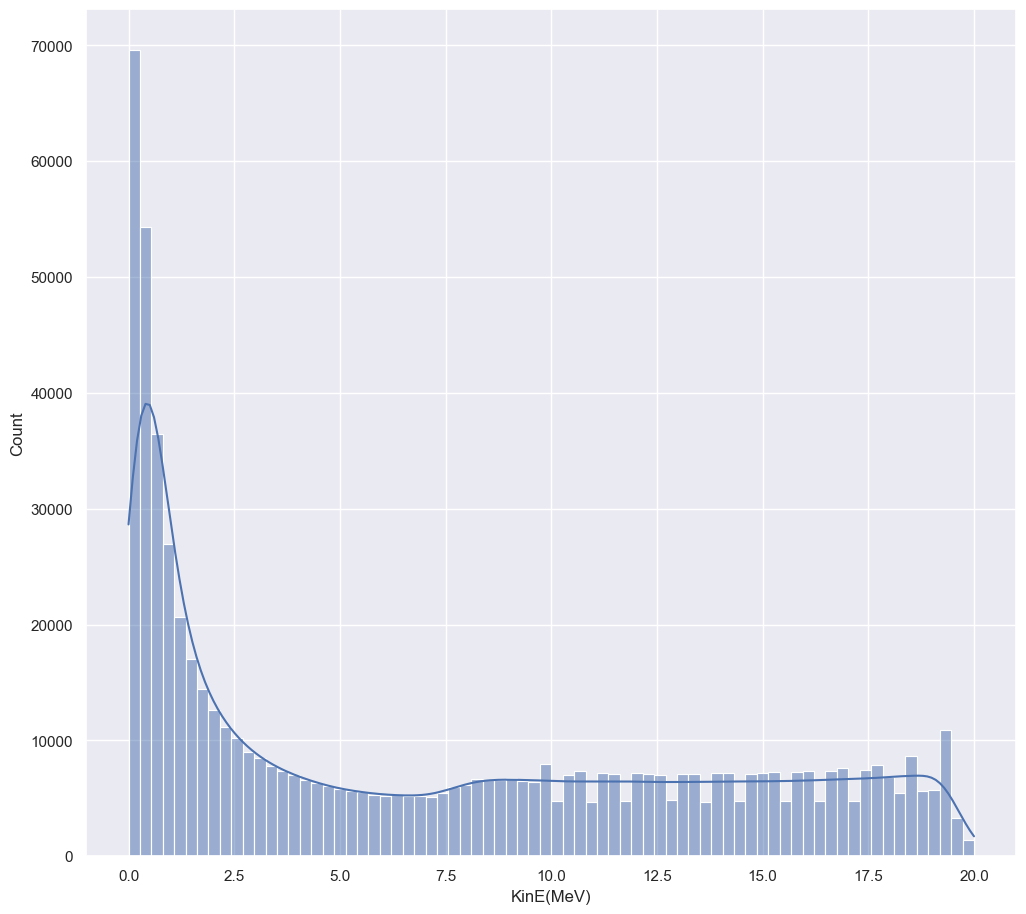

In [16]:
#Histoplot of KinE(MeV)
sns.histplot(data=dataplot, x="KinE(MeV)", kde=True)

<AxesSubplot:xlabel='StepLeng', ylabel='Count'>

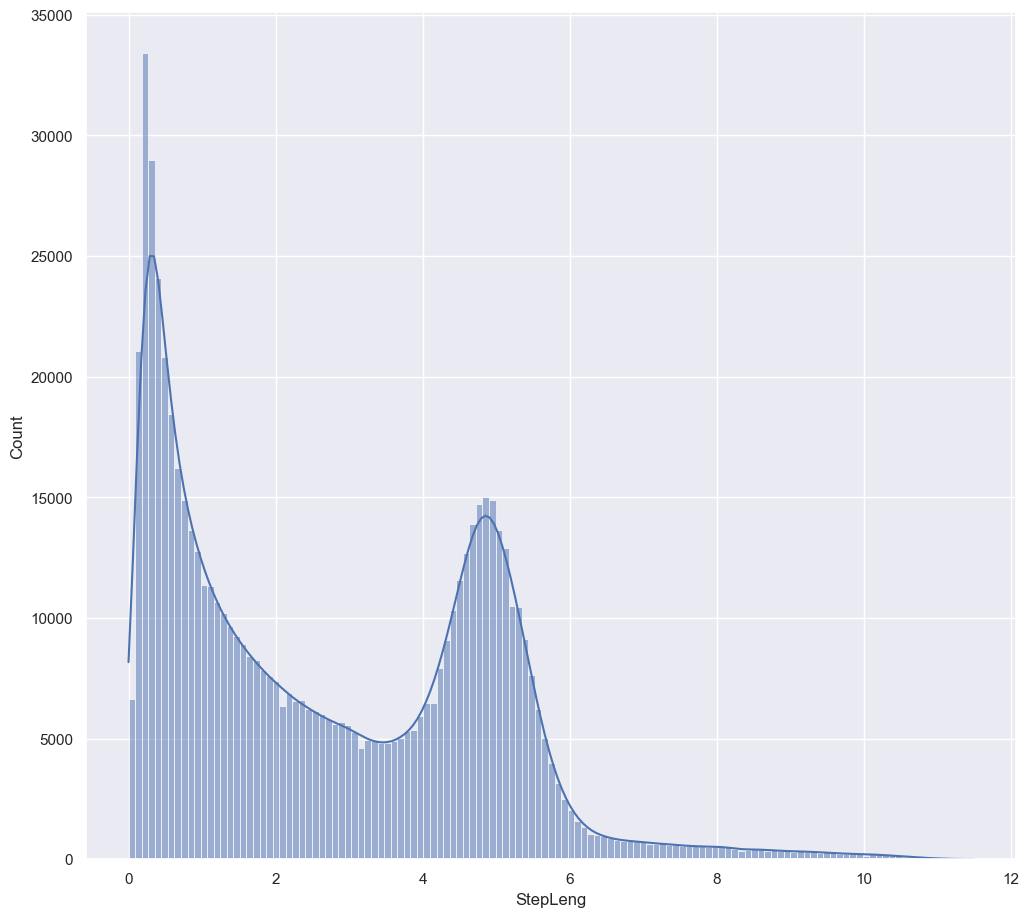

In [17]:
#Histoplot of StepLeng
sns.histplot(data=dataplot, x="StepLeng", kde=True)

<AxesSubplot:xlabel='DZ', ylabel='Count'>

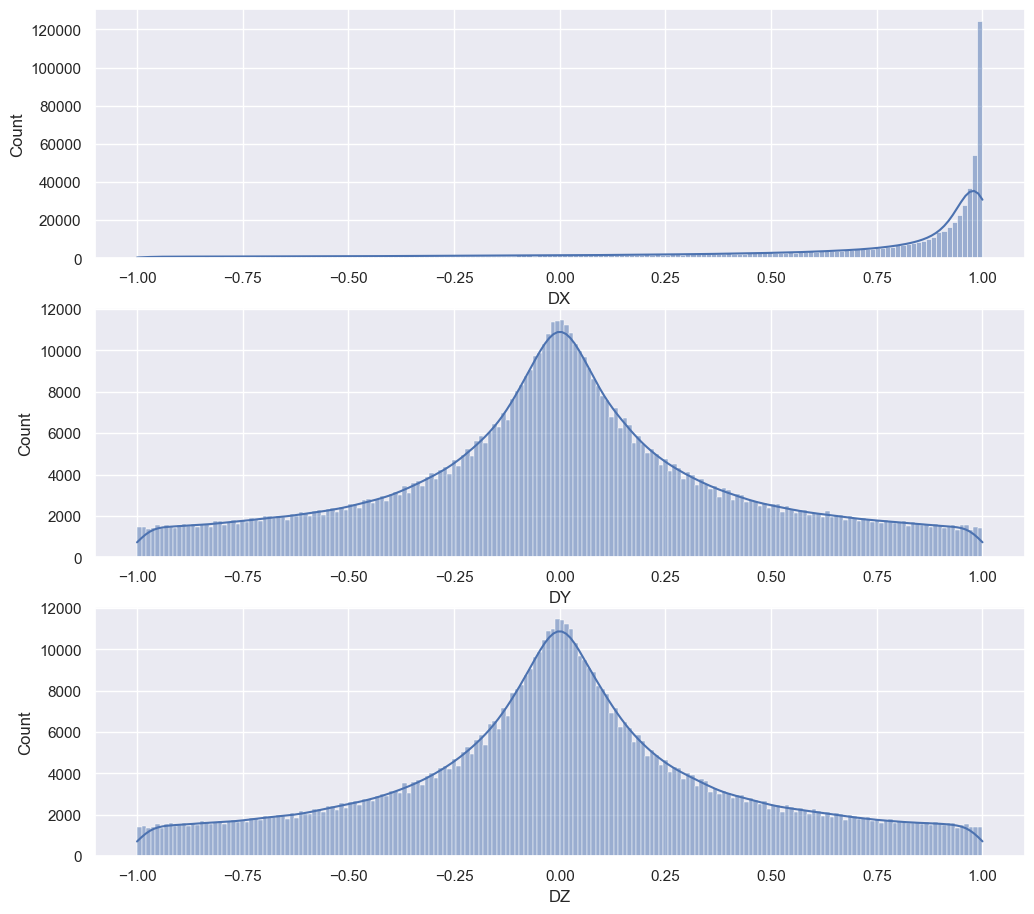

In [20]:
#Histoplot of DX, DY and DZ
fig,axes= plt.subplots(3, 1)
sns.histplot(data=dataplot, x="DX", kde=True,ax=axes[0])
sns.histplot(data=dataplot, x="DY", kde=True,ax=axes[1])
sns.histplot(data=dataplot, x="DZ", kde=True,ax=axes[2])

<AxesSubplot:xlabel='Z(mm)', ylabel='Count'>

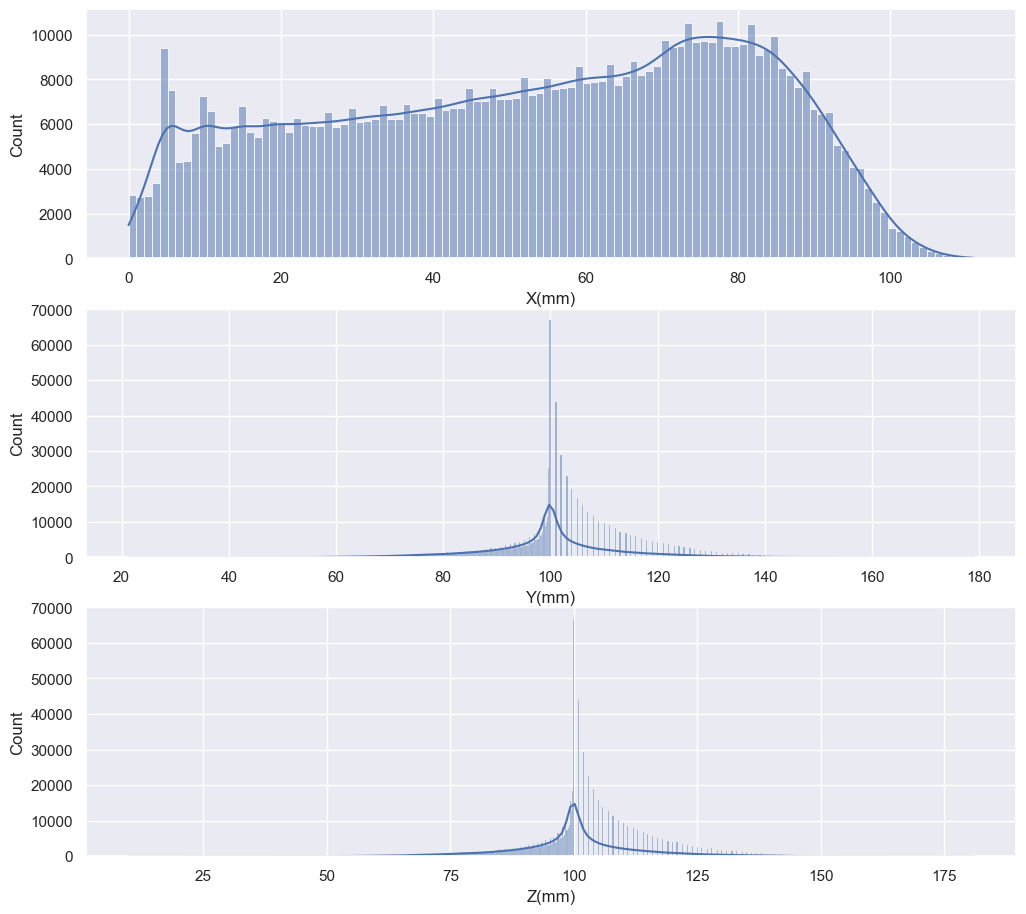

In [21]:
#Histoplot of X, Y and Z
fig,axes= plt.subplots(3, 1)
sns.histplot(data=dataplot, x="X(mm)", kde=True,ax=axes[0])
sns.histplot(data=dataplot, x="Y(mm)", kde=True,ax=axes[1])
sns.histplot(data=dataplot, x="Z(mm)", kde=True,ax=axes[2])

<AxesSubplot:xlabel='KinE(MeV)', ylabel='StepLeng'>

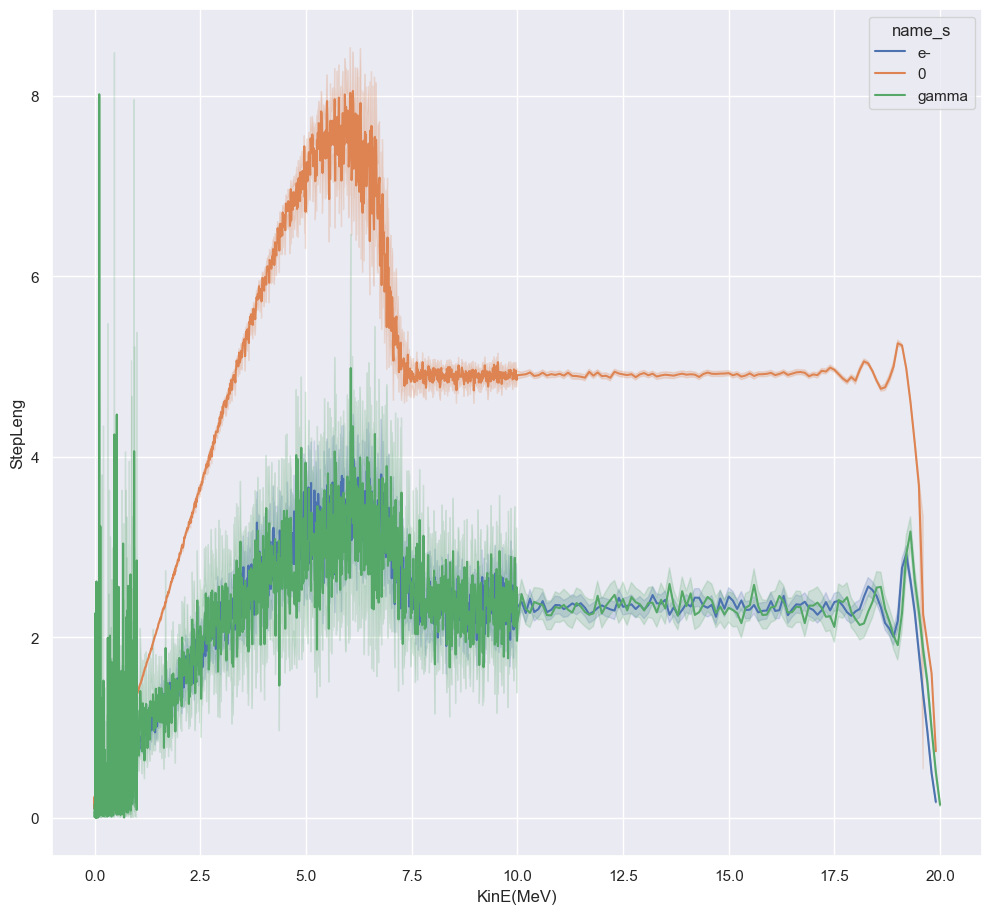

In [24]:
sns.lineplot(data=dataplot, x="KinE(MeV)", y="StepLeng",hue="name_s")

<AxesSubplot:>

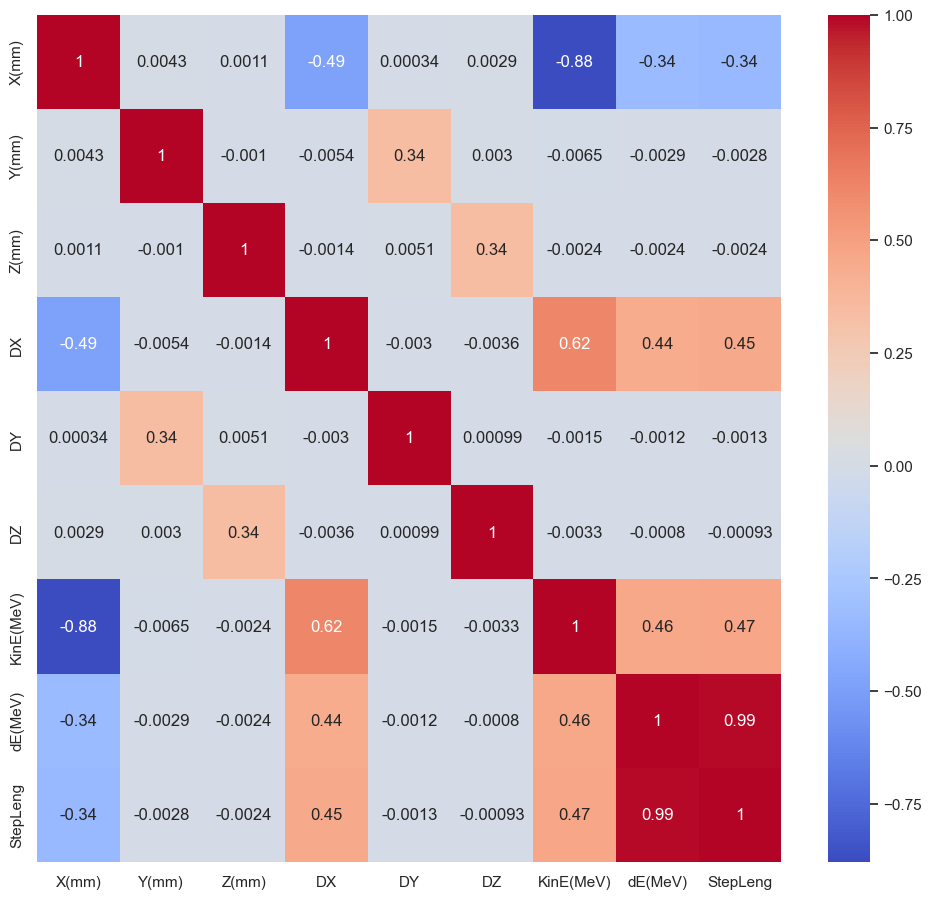

In [5]:
sns.heatmap(df_heatmap.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
sns.regplot(x="dE(MeV)", y="StepLeng", data=df_heatmap)

<AxesSubplot:xlabel='dE(MeV)', ylabel='StepLeng'>